In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70,resize = 0.4)

In [3]:
n_samples, h,w =lfw_people.images.shape

In [4]:
X = lfw_people.data
y = lfw_people.target

In [5]:
n_features = X.shape[1]

In [6]:
X.shape

(1288, 1850)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

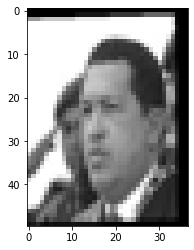

In [8]:
plt.imshow(X[0].reshape((h,w)), cmap=plt.cm.gray)

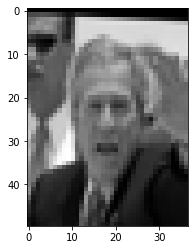

In [9]:
plt.imshow(X[10].reshape((h,w)), cmap=plt.cm.gray)

### the label to predict is the if of the  person

In [10]:
target_names = lfw_people.target_names 
n_classes = target_names.shape[0]

In [11]:
print("Total dataset size : ")
print("n_samples : %d "% n_samples)
print("n_features : %d "% n_features)
print("n_classes : %d "% n_classes)

Total dataset size : 
n_samples : 1288 
n_features : 1850 
n_classes : 7 


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time 

### To get training  and test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = .25,random_state =1)
t0 = time()

In [14]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

c:\users\rishabh rathore\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Checking the accuracy on training and test dataset

In [15]:
train_score_logReg = logReg.score(X_train, y_train) 
test_score_logReg = logReg.score(X_test, y_test)
print(time()-t0,"Seconds")
print("\nLogistic Rregression............................................\n")
print("The train score for Logistic Regressio is {}".format(train_score_logReg))
print("The test score for Logistic Regressio is {}.".format(test_score_logReg))

0.7781047821044922 Seconds

Logistic Rregression............................................

The train score for Logistic Regressio is 1.0
The test score for Logistic Regressio is 0.8198757763975155.


### Now, try this with our superfaces:

In [17]:
from sklearn import decomposition
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled)
n_components = 75
# Extracing the top %d eigenfaces from %d faces

In [18]:
pca = decomposition.PCA(n_components = n_components , whiten = True).fit(X_train)

In [19]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
logReg.fit(X_train_pca,y_train)
y_pred = logReg.predict(X_test_pca)

In [24]:
print(accuracy_score(y_pred,y_test),"Accuracy")
print((time()-t0),"Seconds")

0.7391304347826086 Accuracy
121.04894399642944 Seconds


In [44]:
def plot_gallery(images,titles,n_row =3, n_col=4):
    plt.figure(figsize=(1.8*n_col , 2.4*n_row))
    plt.subplots_adjust(bottom =0,left=.01,right =.99, top = .90,hspace=.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row,n_col,i+1)
        plt.imshow(images[i],cmap=plt.cm.gray)
        plt.title(titles[i],size=18)

eigenfaces = pca.components_.reshape((n_components,h,w))
eigenface_titles = ['eigenfaces %d'% i for i in range (eigenfaces.shape[0])]

<function matplotlib.pyplot.show(close=None, block=None)>

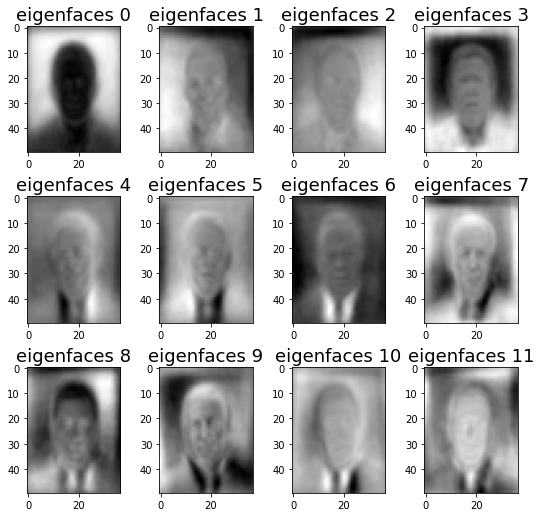

In [45]:
plot_gallery(eigenfaces,eigenface_titles)
plt.show